# **Support Vector Machine**

**Importing the required Packages**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Importing the Dataset**

In [ ]:
data = pd.read_csv('UCI_Credit_Card.csv')
data.head(7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


 **Checking Null Values**

In [ ]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**Target Data**

In [ ]:
y = data['default.payment.next.month']
X = data.drop(['ID', 'default.payment.next.month'], axis=1)

In [ ]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


**Shape of the Dataset**

In [ ]:
X.shape

(30000, 23)

**Describing the Dataset**

In [ ]:
data.describe

<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
0          1    20000.0    2  ...       0.0       0.0                           1
1          2   120000.0    2  ...       0.0    2000.0                           1
2          3    90000.0    2  ...    1000.0    5000.0                           0
3          4    50000.0    2  ...    1069.0    1000.0                           0
4          5    50000.0    1  ...     689.0     679.0                           0
...      ...        ...  ...  ...       ...       ...                         ...
29995  29996   220000.0    1  ...    5000.0    1000.0                           0
29996  29997   150000.0    1  ...       0.0       0.0                           0
29997  29998    30000.0    1  ...    2000.0    3100.0                           1
29998  29999    80000.0    1  ...   52964.0    1804.0                           1
29999  30000    50000.0    1  ...    1000.0    1000.0           

**Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


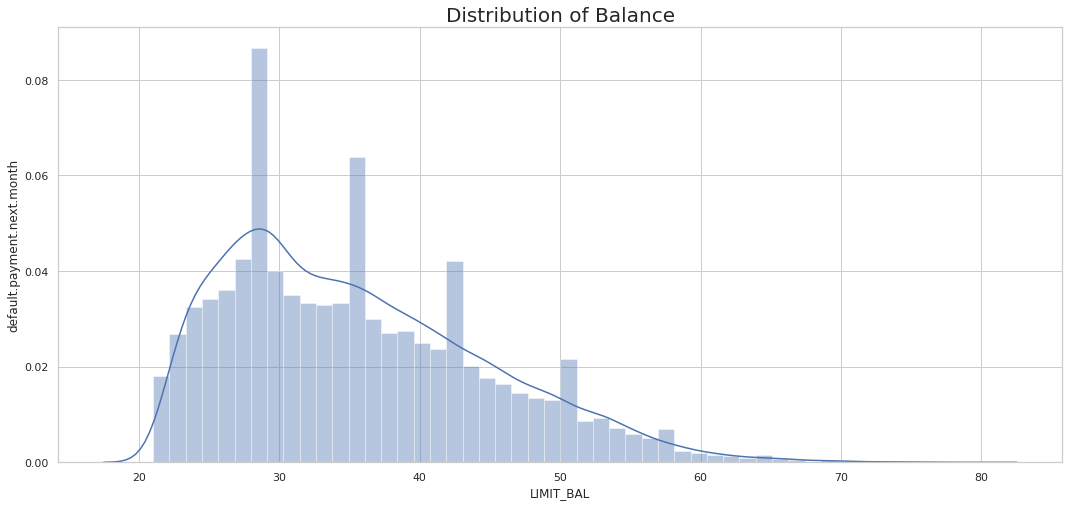

In [ ]:
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (18, 8)
sns.set(style = 'whitegrid')
sns.distplot(data['AGE'])
plt.title('Distribution of Balance', fontsize = 20)
plt.xlabel('LIMIT_BAL')
plt.ylabel('default.payment.next.month')
plt.show()

**Correlation**

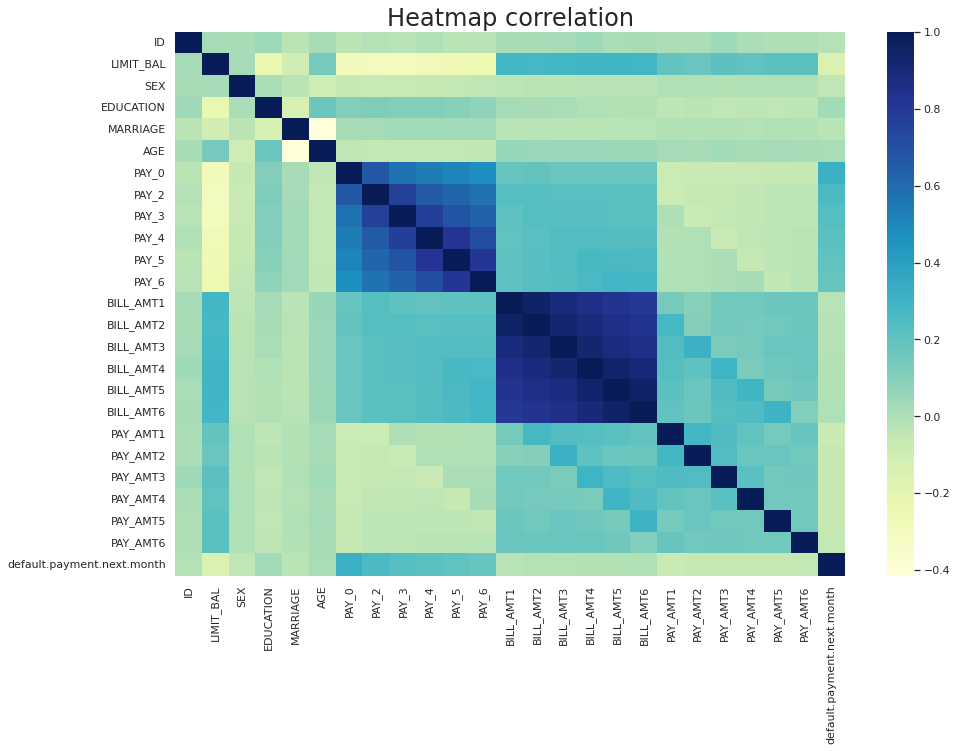

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn
data_corr = data.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(data_corr, cmap="YlGnBu")
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

As we can notice, most of the features are not correlated with each other.

**SVM Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=100)
model = SVC()

model.fit(train_X, train_y)

prediction = model.predict(test_X)


**Accuracy**

In [ ]:
print(confusion_matrix(test_y, prediction))
print(classification_report(test_y, prediction))
print('\n')
print(accuracy_score(test_y, prediction))

[[9274    0]
 [2726    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9274
           1       0.00      0.00      0.00      2726

    accuracy                           0.77     12000
   macro avg       0.39      0.50      0.44     12000
weighted avg       0.60      0.77      0.67     12000



0.7728333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM Model**

In [ ]:
SVM_Model = SVC(gamma= 'auto')
SVM_Model.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Model Accuracy**

In [ ]:
print (f'Accuracy : {SVM_Model.score(X,y):f}')

Accuracy : 0.993133
